# **Visão Computacional**

## Detecção de Faces

### Bibliotecas

In [1]:
# Libs
import cv2
import matplotlib.pyplot as plt
print(cv2.__version__)
print(cv2.face.__doc__)

4.8.0
None


In [2]:
# Carregando a imagem
# Imagem BGR
img = cv2.imread('./data/workplace-1245776_1920.jpg')
# Imagem RGB
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

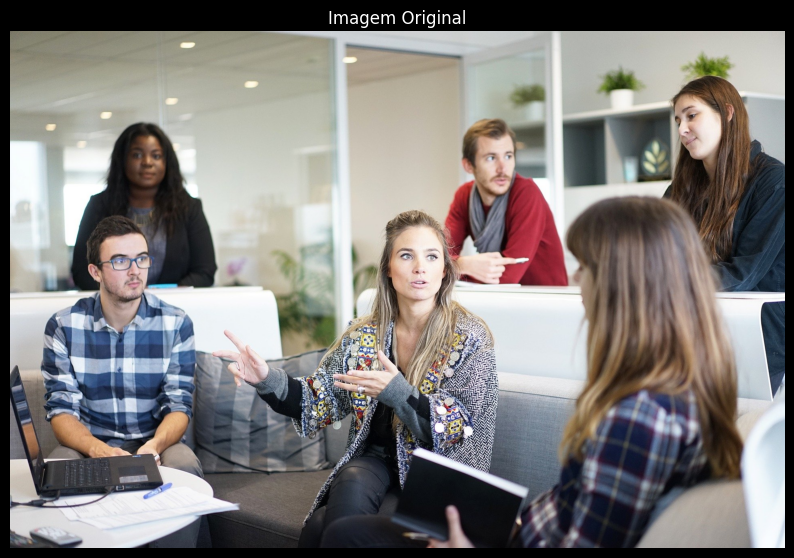

In [3]:
# Visualizando a imagem
plt.figure(figsize=(10,10))
plt.title('Imagem Original')
plt.imshow(imgRGB)
plt.axis('off')
plt.show()

In [4]:
# Importando o modelo
detector_face = cv2.CascadeClassifier('./data/haarcascade_frontalface_default.xml')

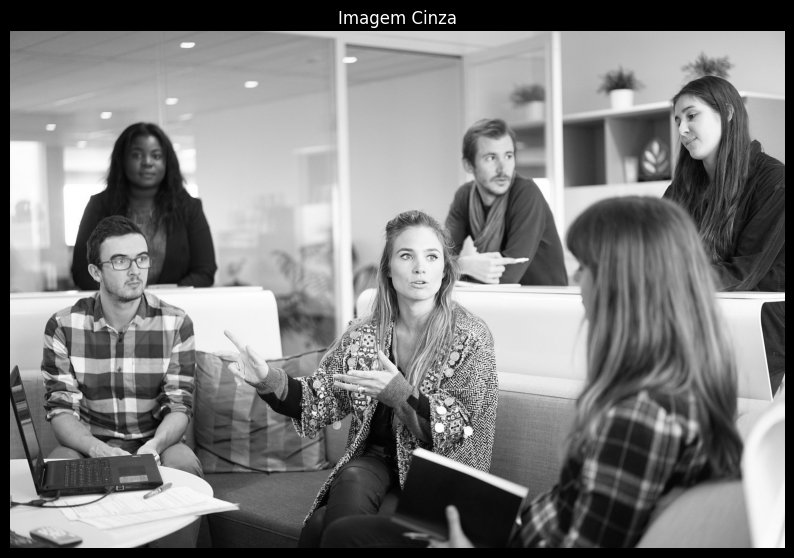

In [5]:
# Convertendo a imagem para escala de cinza
imagem_cinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_cinzaRGB = cv2.cvtColor(imagem_cinza, cv2.COLOR_GRAY2RGB)
plt.figure(figsize=(10,10))
plt.title('Imagem Cinza')
plt.imshow(img_cinzaRGB)
plt.axis('off')
plt.show()

In [6]:
# Variáveis de detecção 
deteccoes =detector_face.detectMultiScale(imagem_cinza, scaleFactor=1.3, minSize=(30,30))
deteccoes

array([[1635,  156,  147,  147],
       [ 284,  262,  114,  114],
       [1149,  260,  129,  129],
       [ 928,  491,  171,  171],
       [ 222,  507,  151,  151]])

In [7]:
# Tamanho da matriz 
len(deteccoes)

5

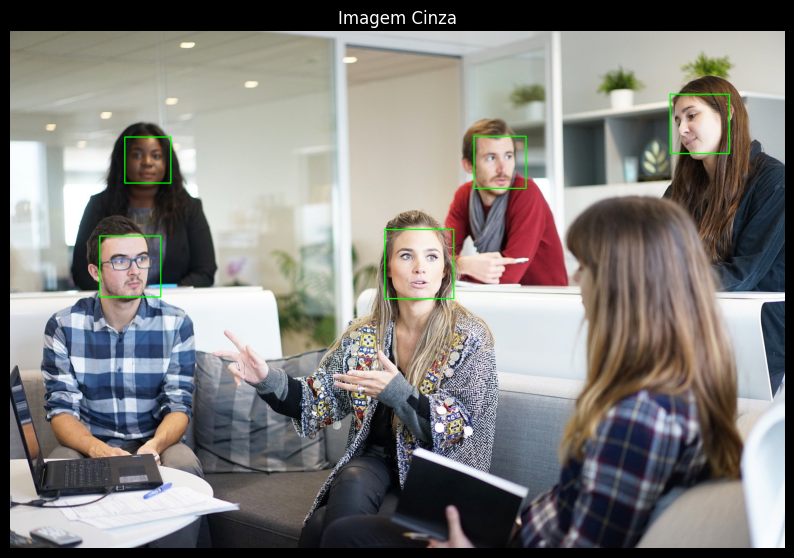

In [8]:
for (x, y, l, a) in deteccoes:
    #print(x, y, l, a)
    cv2.rectangle(imgRGB, (x, y), (x + l, y + a), (0,255,0), 2)
plt.figure(figsize=(10,10))
plt.title('Imagem Cinza')
plt.imshow(imgRGB)
plt.axis('off')
plt.show()

## Reconhecimento Facial

### Bibliotecas

In [9]:
# Libs
from PIL import Image
import numpy as np
import os

### Base de Treinamento

In [10]:
# Imagens de treinamento
os.listdir('./data/yalefaces/train/')

['subject01.glasses.gif',
 'subject01.leftlight.gif',
 'subject01.noglasses.gif',
 'subject01.normal.gif',
 'subject01.rightlight.gif',
 'subject01.sad.gif',
 'subject01.sleepy.gif',
 'subject01.surprised.gif',
 'subject01.wink.gif',
 'subject02.glasses.gif',
 'subject02.happy.gif',
 'subject02.noglasses.gif',
 'subject02.normal.gif',
 'subject02.rightlight.gif',
 'subject02.sad.gif',
 'subject02.sleepy.gif',
 'subject02.surprised.gif',
 'subject02.wink.gif',
 'subject03.centerlight.gif',
 'subject03.happy.gif',
 'subject03.noglasses.gif',
 'subject03.normal.gif',
 'subject03.rightlight.gif',
 'subject03.sad.gif',
 'subject03.sleepy.gif',
 'subject03.surprised.gif',
 'subject03.wink.gif',
 'subject04.centerlight.gif',
 'subject04.glasses.gif',
 'subject04.happy.gif',
 'subject04.noglasses.gif',
 'subject04.normal.gif',
 'subject04.rightlight.gif',
 'subject04.sad.gif',
 'subject04.sleepy.gif',
 'subject04.wink.gif',
 'subject05.centerlight.gif',
 'subject05.glasses.gif',
 'subject05.ha

In [11]:
# Função para ler os dados das imagens
def dados_imagem():
    caminhos = [os.path.join('./data/yalefaces/train/', f) for f in os.listdir('./data/yalefaces/train/')]
    faces = []
    ids = []
    for caminho in caminhos:
        imagem = Image.open(caminho).convert('L')
        imagemNP = np.array(imagem, 'uint8')
        id = int(os.path.split(caminho)[1].split(".")[0].replace('subject', ''))
        ids.append(id)
        faces.append(imagemNP)
    return np.array(ids), faces

In [12]:
# Utilizando a função
ids, faces = dados_imagem()

In [13]:
# Visualizando os Ids
print(ids)

[ 1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3
  3  3  3  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  6  6  6
  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8
  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11
 11 11 11 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15]


In [14]:
# Visualizando as faces
print(faces)

[array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 252, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8), array([[130, 130, 130, ..., 216, 224, 244],
       [255, 255, 255, ..., 215, 220, 245],
       [255, 255, 255, ..., 231, 211, 231],
       ...,
       [255, 255, 255, ..., 192, 197, 203],
       [255, 255, 255, ..., 189, 207, 215],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8), array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8), array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 

In [15]:
# Fazendo o treinamento do modelo
lbph = cv2.face.LBPHFaceRecognizer_create()
lbph.train(faces, ids)

# Salvando o modelo treinado    
lbph.write('classificador_lbph.yml')

### Classificação

In [16]:
# Criando o reconhecedor
reconhecedor = cv2.face.LBPHFaceRecognizer_create()
reconhecedor.read("classificador_lbph.yml")

In [17]:
# Carregando uma imagem de teste
image_teste = r'C:\IA_e_Machine_Learning\1.3-Visao_computacional\data\yalefaces\test\subject10.sad.gif'

In [18]:
# convertendo a imagem
imagem = Image.open(image_teste).convert('L')

# transformando a imagem em um array
imagem_array = np.asarray(imagem, 'uint8')
print(imagem_array)

[[130 130 130 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 241 255 255]
 [255 255 255 ... 234 237 252]
 [ 68  68  68 ...  68  68  68]]


In [19]:
# Previsão
idprevisto, _ = reconhecedor.predict(imagem_array)
idprevisto

10

In [20]:
# Visualizando o id correto
idcorreto = int(os.path.split(image_teste)[1].split(".")[0].replace('subject', ''))
idcorreto

10

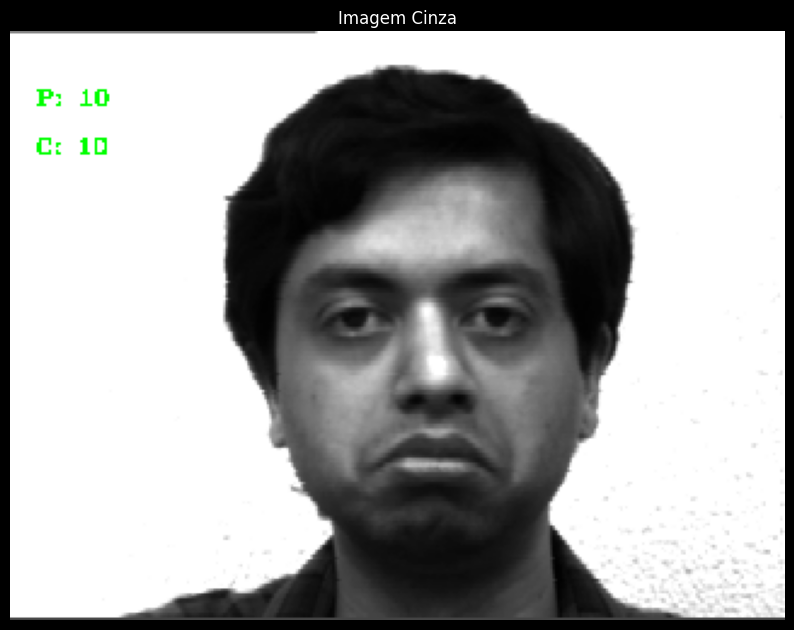

In [21]:
# Suponho que imagem_array e os IDs já foram definidos anteriormente

# Convertendo a imagem para RGB
img_cinzaRGB = cv2.cvtColor(imagem_array, cv2.COLOR_GRAY2RGB)

# Adicionando o texto diretamente na imagem usando OpenCV
font_scale = 0.5
font = cv2.FONT_HERSHEY_COMPLEX_SMALL

# Definindo as coordenadas iniciais (pode ajustar conforme necessário)
x = 10
y = 30

cv2.putText(img_cinzaRGB, f'P: {idprevisto}', (x, y), font, font_scale, (0, 255, 0), 1)
cv2.putText(img_cinzaRGB, f'C: {idcorreto}', (x, y + 20), font, font_scale, (0, 255, 0), 1)

# Visualizando a imagem com matplotlib
plt.figure(figsize=(10, 10))
plt.title('Imagem Cinza')
plt.imshow(img_cinzaRGB)
plt.axis('off')
plt.show()
